# Part II - Features of Delayed Flights
## by Corinne Sandor

## Investigation Overview

For my presentation, I focus on the just the influence of delay types and airline carriers on departure delay times. 

I start by introducing the frequency at which certain delay types occur, then looking at the average delay time for each main delay type on a day to day basis. Afterwards, I do the same thing for airline carriers. 

Since there seemed to be some trends with airline carrier delays, we wrap up this presentation by looking at the average departure delays for each airline carrier by delay type. 

## Dataset Overview

This dataset contains information about 200,802 delayed flights from 1987 to 2008 (with the exception of the years 2001 & 2002). It contains 25 features, 11 of which we will be looking into:

- Departure Delay
- Airline Carrier Delay
- Weather Delay
- National Aviation System (NAS) Delay
- Security Delay
- Late Aircraft Delay
- Day of the Week 
- Airline Carrier
- Origin Airport
- Destination Airport
- Delay Type (Carrier, Weather, NAS, Security, Late Aircraft)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
delayed_df = pd.read_csv('wrangled.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What are the most frequent reasons for departure delays?

Late aircrafts, airline carriers and national aviation system delays.

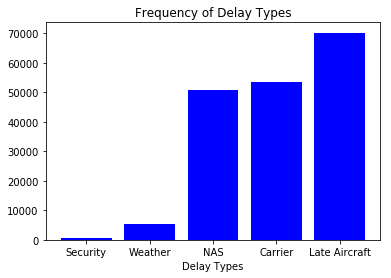

In [3]:
#getting non-zero & non-null delay counts for each delay type
c = delayed_df.query('carrier!="None"').shape[0]
w = delayed_df.query('weather!="None"').shape[0]
n = delayed_df.query('nas!="None"').shape[0]
s = delayed_df.query('security!="None"').shape[0]
l = delayed_df.query('late!="None"').shape[0]

#creating dictionary with delay types & counts
delay_types = {'Carrier': c, 'Weather': w, 'NAS': n, 'Security': s, 'Late Aircraft':l}

#sorting each item pair by the key values & converting back to dict 
delay_types = dict(sorted(delay_types.items(), key=lambda x:x[1]))

#plot bar chart with counts of each delay type
plt.bar(x = range(len(delay_types.keys())), height = list(delay_types.values()), 
        tick_label = list(delay_types.keys()), color = 'blue');
plt.xlabel('Delay Types');
plt.title('Frequency of Delay Types');

## How long does each delay type last on average?

In order from shortest to longest:
- From day to day, Security & NAS delays are consistently 30-40 minutes on average, with 1 exception. Security delays can be oddly long on Saturdays at 60 minuteds.
- Late Aircraft & Carrier delays are consistenly 50-60 minutes on average.
- Weather delays tend to be the longest delays at 60-90 minutes on average.

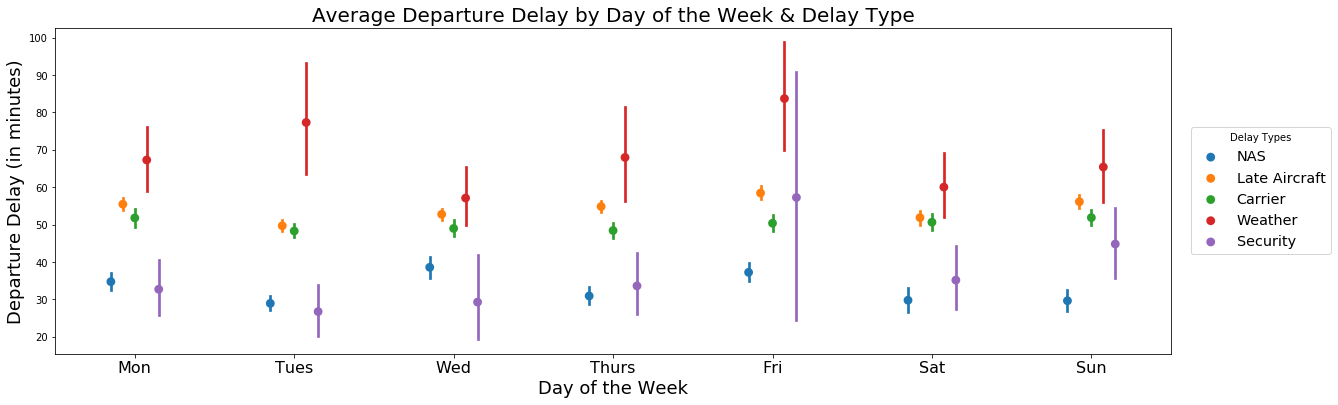

In [34]:
# putting rows from the dataframe that just have 'l', 'c', 'n', 's', 'w' 
# as the delay type (no multiple delay reasons)
pure_delays = delayed_df[delayed_df.delay.isin(['l', 'c', 'n', 's', 'w'])]

# plotting a pointplot for Average Departure Delay by Day of the Week & Delay Type
fig = plt.figure(figsize = [20,6]);
ax = sb.pointplot(data = pure_delays, x = 'DayOfWeek', y = 'DepDelay', hue = 'delay',
                  linestyles = '', dodge = 0.3);
plt.title('Average Departure Delay by Day of the Week & Delay Type', fontsize = 20);
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], fontsize = 16);
plt.xlabel('Day of the Week', fontsize = 18);
plt.ylabel('Departure Delay (in minutes)', fontsize = 18);
legend_labels = ['NAS', 'Late Aircraft', 'Carrier', 'Weather', 'Security'];
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, legend_labels, 
          title = 'Delay Types', fontsize = 'x-large',
          bbox_to_anchor=(1.15, .5), loc='right');

## What airlines are most often departing late?

Southwest Airlines (WN) has significantly more departure delays than any of the other airlines. In fact, it has 3x more departures delays than the airline with the next highest frequency, US Airways (US).

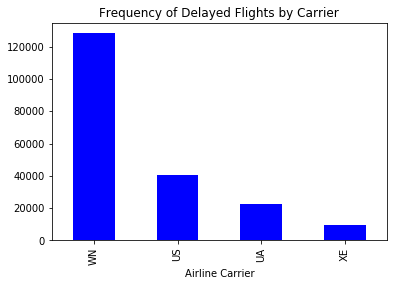

In [15]:
# plot barchart for distribution of delayed flights by unique carriers
ind = delayed_df['UniqueCarrier'].value_counts().index;
delayed_df['UniqueCarrier'].value_counts()[ind].plot(kind = "bar", color='blue');
plt.xlabel('Airline Carrier');
plt.title('Frequency of Delayed Flights by Carrier');

## What is the average delay time for each airline carrier?

From day to day, 
- JSX Airlines (XE) and United Airlines(UA) tend to have higher average delay times, around 35-50 minutes, but are their lowest on Saturday and Sunday.
- Southwest Airlines (WN) and US Airways (US) tend to have lower average delay times, around 20-32 minutes.

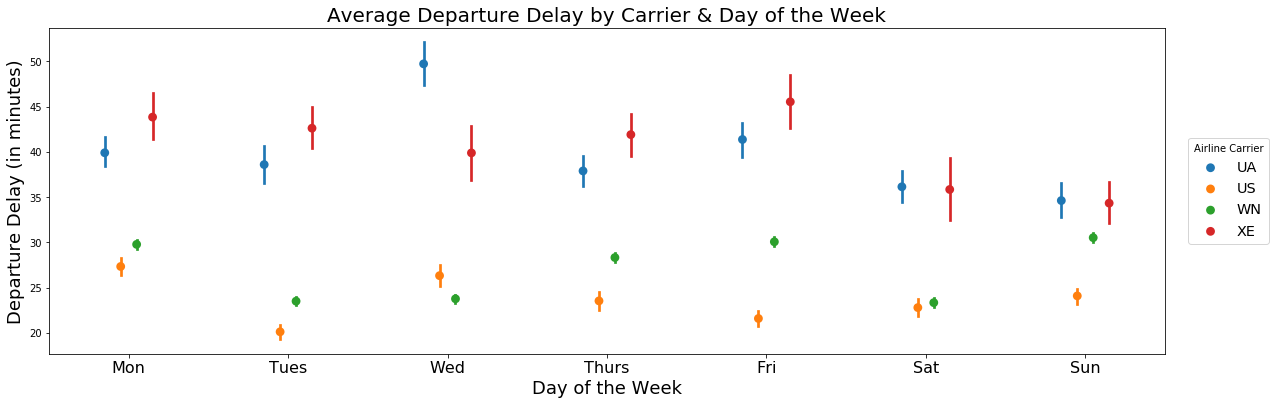

In [33]:
fig = plt.figure(figsize = [20,6]);
ax = sb.pointplot(data = delayed_df, x = 'DayOfWeek', y = 'DepDelay', hue = 'UniqueCarrier',
                  linestyles = '', dodge = 0.3);
plt.title('Average Departure Delay by Carrier & Day of the Week', fontsize = 20);
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], fontsize = 16);
plt.xlabel('Day of the Week', fontsize = 18);
plt.ylabel('Departure Delay (in minutes)', fontsize = 18);
ax.legend(title = 'Airline Carrier', fontsize = 'x-large',
         bbox_to_anchor=(1.1, .5), loc='right' );

## Is there a difference in how long each delay type lasts for each carrier?

- As we saw before, late aircraft, carrier & weather delays typically are the longest delays. Southwest Airlines (WN) handles carrier delays a little better than the rest, with an average carrier delay time around 45 minutes. 
- From day to day, US Airways (US) and Southwest Airlines (WN) have the shortest National Aviation System (NAS) delays on average, around 20-25 minutes.
- Security delays are usually around 35 minutes on average, except for US Airways (US). Their secuirty delays last around 80 minutes on average.

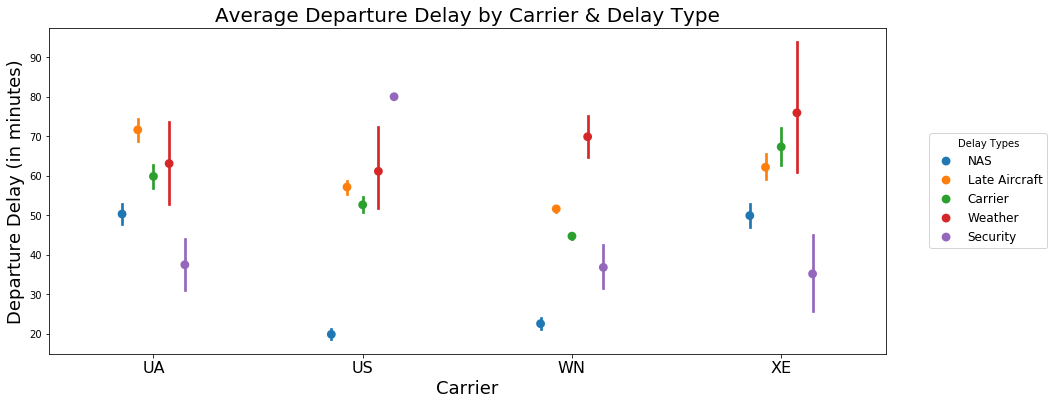

In [31]:
fig = plt.figure(figsize = [15,6]);
ax = sb.pointplot(data = pure_delays, x = 'UniqueCarrier', y = 'DepDelay', hue = 'delay',
                  linestyles = '', dodge = 0.3);
plt.title('Average Departure Delay by Carrier & Delay Type', fontsize = 20);
plt.xticks(fontsize = 16);
plt.xlabel('Carrier', fontsize = 18);
plt.ylabel('Departure Delay (in minutes)', fontsize = 18);
legend_labels = ['NAS', 'Late Aircraft', 'Carrier', 'Weather', 'Security'];
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, legend_labels, title = 'Delay Types',
          fontsize = 'large', bbox_to_anchor=(1.2, .5), loc='right' );

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [37]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slides.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slides.ipynb to slides
[NbConvertApp] Writing 447410 bytes to Part_II_slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbc

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
